In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as pdr 
import yfinance as yf
import matplotlib.pyplot as plt 
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [3]:
# numpy.__version__
np.__version__

'1.19.3'

In [4]:
# 원소별 연산 (element-wise)
# 브로드캐스팅 (BroadCasting)
A = np.array([[1,2], [3,4]])
A
A.T
A + A

array([[1, 2],
       [3, 4]])

array([[1, 3],
       [2, 4]])

array([[2, 4],
       [6, 8]])

## 3.4 주식 비교하기

In [5]:
# 원래는 pandas-datareader 라이브러리 만으로도 야후 금융 데이터를 가져올 수 있었으나 최근 야후의 데이터 제공 방식이 변경됨에 따라 fix_yahoo_finance 라이브러리를 함께 사용해  pandas-datareader가 야후 금융에서 데이터를 크롤링 방식으로 획득할 수 있도록 도와줍니다.
# fix_yahoo_finance 모듈에서 해당함수를 호출하면 야후에서 데이터를 획득하는 방식이 크롤링으로 변경되어 주가 데이터를 불러올 수 있게 하기 위합
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
sec.head()
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-03,92.959999,94.930000,92.449997,94.070000,90.590263,31142500
2018-05-04,93.320000,95.370003,92.919998,95.160004,91.639946,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,92.660728,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,92.265900,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,93.354095,27327400


In [7]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-12-18,218.589996,219.690002,216.020004,218.589996,218.589996
2020-12-21,217.550003,224.000000,217.279999,222.589996,222.589996
2020-12-22,222.690002,225.630005,221.850006,223.940002,223.940002
2020-12-23,223.110001,223.559998,220.800003,221.020004,221.020004
2020-12-24,221.419998,223.610001,221.199997,222.750000,222.750000


In [8]:
sec.index
sec.columns

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24'],
              dtype='datetime64[ns]', name='Date', length=649, freq=None)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

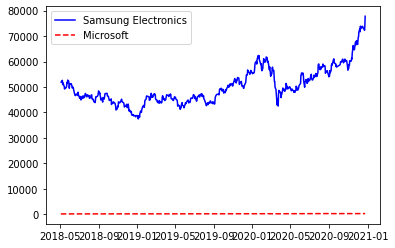

In [9]:
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics');
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft');
plt.legend(loc='best');

- 일간 변동률

$$ R_t(오늘 변동률) = {{R_t(오늘종가) - R_{t-1}(어제종가)} \over R_{t-1}(어제종가)} \times 100 $$

In [10]:
sec['Close']
sec['Close'].shift(1)

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2020-12-18    73000.0
2020-12-21    73000.0
2020-12-22    72300.0
2020-12-23    73900.0
2020-12-24    77800.0
Name: Close, Length: 649, dtype: float64

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2020-12-18    73300.0
2020-12-21    73000.0
2020-12-22    73000.0
2020-12-23    72300.0
2020-12-24    73900.0
Name: Close, Length: 649, dtype: float64

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

(array([  2.,   3.,   8.,  19.,  55., 104., 149., 152.,  90.,  36.,  17.,
          7.,   5.,   1.,   0.,   0.,   0.,   1.]),
 array([-6.3876652 , -5.45109556, -4.51452593, -3.57795629, -2.64138666,
        -1.70481702, -0.76824739,  0.16832225,  1.10489188,  2.04146152,
         2.97803115,  3.91460079,  4.85117042,  5.78774006,  6.72430969,
         7.66087933,  8.59744896,  9.5340186 , 10.47058824]),
 <BarContainer object of 18 artists>)

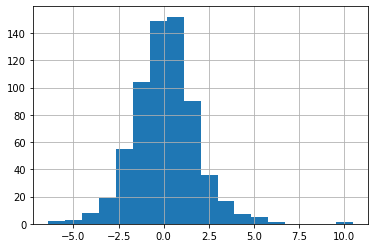

In [15]:
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc.head()
plt.hist(sec_dpc, bins=18)
plt.grid(True)

In [17]:
sec_dpc.describe()

count    649.000000
mean       0.077737
std        1.756590
min       -6.387665
25%       -0.993377
50%        0.106383
75%        1.046025
max       10.470588
Name: Close, dtype: float64

In [18]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-12-18    43.919972
2020-12-21    43.919972
2020-12-22    42.961068
2020-12-23    45.174069
2020-12-24    50.451471
Name: Close, Length: 649, dtype: float64

In [20]:
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

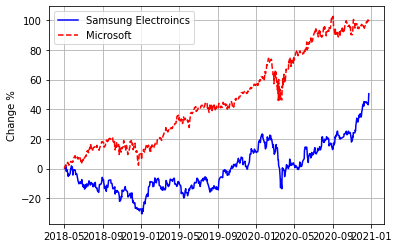

In [23]:
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electroincs');
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft');
plt.ylabel('Change %');
plt.grid(True);
plt.legend(loc='best');

## 3.5 최대 손실 낙폭
- ### MDD (Maximum Drawdown, 최대 손실 낙폭)


$$ MDD = { {최저점 - 최고점} \over 최저점} $$

In [43]:
kospi = pdr.get_data_yahoo('^KS11', '2000-01-01')
dow = pdr.get_data_yahoo('^DJI', '2000-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


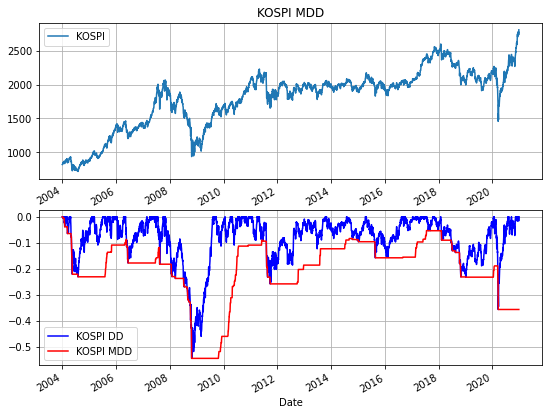

In [42]:
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak  - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9, 7));
plt.subplot(211);
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True);

plt.subplot(212);
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True);
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True);

In [34]:
max_dd.min()

-0.2855476195804082

In [35]:
max_dd[max_dd==-0.2855476195804082]

Date
2020-03-19   -0.285548
2020-03-20   -0.285548
2020-03-23   -0.285548
2020-03-24   -0.285548
2020-03-25   -0.285548
2020-03-26   -0.285548
2020-03-27   -0.285548
2020-03-30   -0.285548
2020-03-31   -0.285548
2020-04-01   -0.285548
Name: Adj Close, dtype: float64

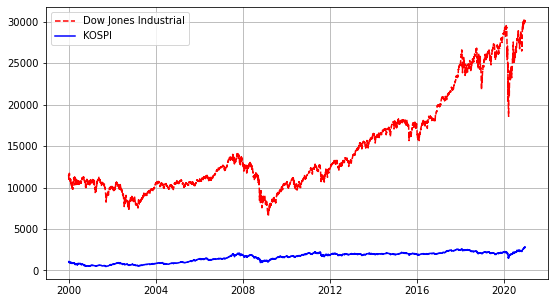

In [45]:
plt.figure(figsize=(9,5));
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial');
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI');
plt.grid(True);
plt.legend(loc='best');

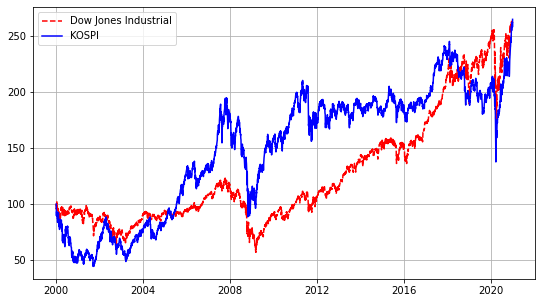

In [47]:
d = (dow.Close / dow.Close.iloc[0]) * 100
k = (kospi.Close / kospi.Close.iloc[0]) * 100

plt.figure(figsize=(9,5));
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial');
plt.plot(k.index, k, 'b', label='KOSPI');
plt.grid(True);
plt.legend(loc='best');

5281

5166

(5438, 2)

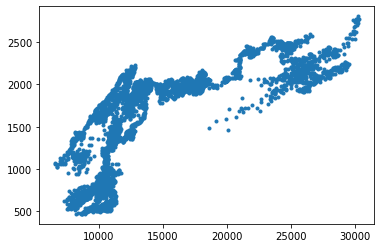

In [54]:
len(dow)
len(kospi)

df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df.shape
df = df.fillna(method='bfill')
plt.scatter(df['DOW'], df['KOSPI'], marker='.')

In [55]:
from scipy import stats

In [58]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07698633962527023, intercept=456.02030762051345, rvalue=0.7559962367904522, pvalue=0.0, stderr=0.0009040956219309736)

In [59]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.755996
KOSPI,0.755996,1.000000


In [60]:
df['DOW'].corr(df['KOSPI'])

0.7559962367904522